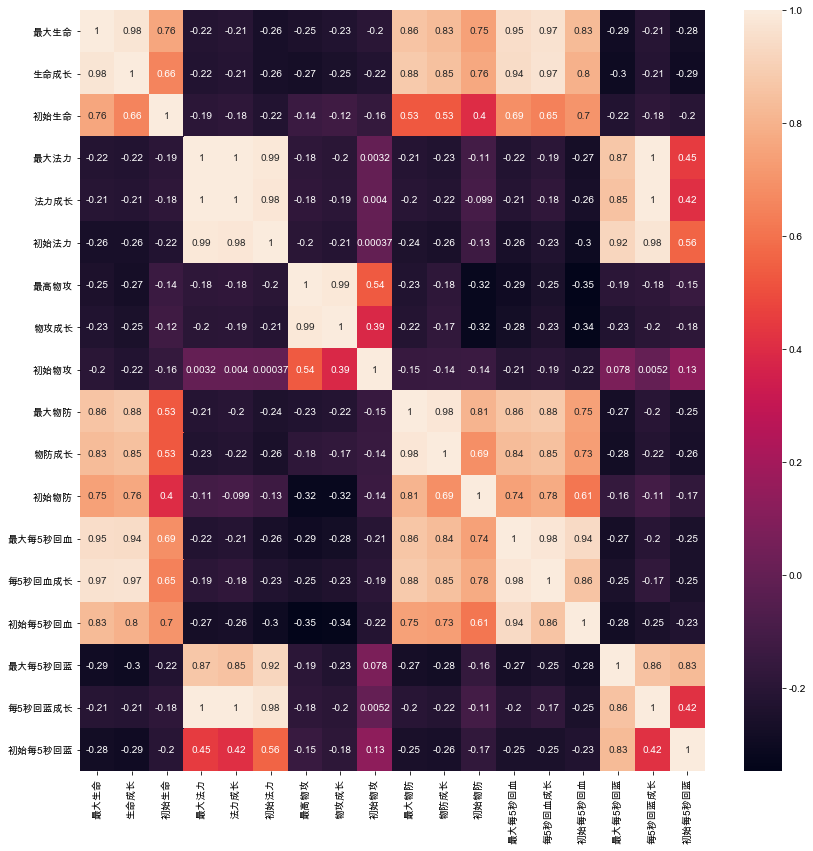

    最大生命  初始生命  最大法力  法力成长  最高物攻  初始物攻  最大物防  初始物防  最大每5秒回血  初始每5秒回血  最大每5秒回蓝  \
0   7350  3307  1746    94   321   159   397   101       98       51       37   
1   7000  3150  1760    95   318   164   409   100       92       48       37   
2   8341  3450   100     0   301   153   504   125      115       57        5   
3   8476  3537  1926   104   273   156   394   109      117       58       42   
4   7344  3564     0     0   343   170   390    99       97       54        0   
..   ...   ...   ...   ...   ...   ...   ...   ...      ...      ...      ...   
64  5968  3269     0     0   427   177   349    89       81       50        0   
65  6205  3239  1808    97   385   173   359    86       79       47       38   
66  6232  3292  1822    98   388   171   342    85       99       52       46   
67  6700  3375  1784    96   328   176   388   107       81       44       38   
68  5611  3019  1784    96   410   188   329    94       68       39       38   

    初始每5秒回蓝    最大攻速 攻击范围  


<ipython-input-62-7adc5df056eb>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['最大攻速'] = data['最大攻速'].apply(lambda x: float(x.strip('%'))/100)
<ipython-input-62-7adc5df056eb>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['攻击范围'] = data['攻击范围'].map({'远程':1, '近战':0})


In [62]:
# 对英雄进行划分
from sklearn.mixture import GaussianMixture
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score

# 加载数据
data_ori = pd.read_csv('data/heros.csv',encoding='gb18030')
features = [u'最大生命',u'生命成长',u'初始生命',u'最大法力',u'法力成长',u'初始法力',u'最高物攻',u'物攻成长',u'初始物攻',u'最大物防',u'物防成长',u'初始物防',u'最大每5秒回血',u'每5秒回血成长',u'初始每5秒回血',u'最大每5秒回蓝',u'每5秒回蓝成长',u'初始每5秒回蓝',u'最大攻速',u'攻击范围']
data = data_ori[features]
data

# 对英雄属性之间的关系进行可视化分析
# 设置plt正确显示中文
from matplotlib import font_manager
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 正常显示中文
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

# 用热力图呈现features_mean字段之间的联系
corr = data[features].corr()
plt.figure(figsize=(14,14))
# annot = True 显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()

# # 对属性进行降维，保留一个相关性属性
features_remain = [u'最大生命',u'初始生命',u'最大法力',u'法力成长',u'最高物攻',u'初始物攻',u'最大物防',u'初始物防',u'最大每5秒回血',u'初始每5秒回血',u'最大每5秒回蓝',u'初始每5秒回蓝',u'最大攻速',u'攻击范围']
data = data_ori[features_remain]
print(data)
data['最大攻速'] = data['最大攻速'].apply(lambda x: float(x.strip('%'))/100)
data['攻击范围'] = data['攻击范围'].map({'远程':1, '近战':0})

# 采用Z-Score规范化数据，保证每个特征维度的数据均值为0，方差为1
ss = StandardScaler()
data = ss.fit_transform(data)

# 构造GMM聚类
gmm = GaussianMixture(n_components = 30, covariance_type = 'full')
gmm.fit(data)

# 训练数据
pred = gmm.predict(data)
print(pred)

# 将分组结果输出到CSV中
data_ori.insert(0, '分组', pred)
data_ori.to_csv('data/hero_gmm.csv', index=False, sep=',',encoding='utf-8')

# 对聚类数据进行评估
print(calinski_harabasz_score(data, pred))

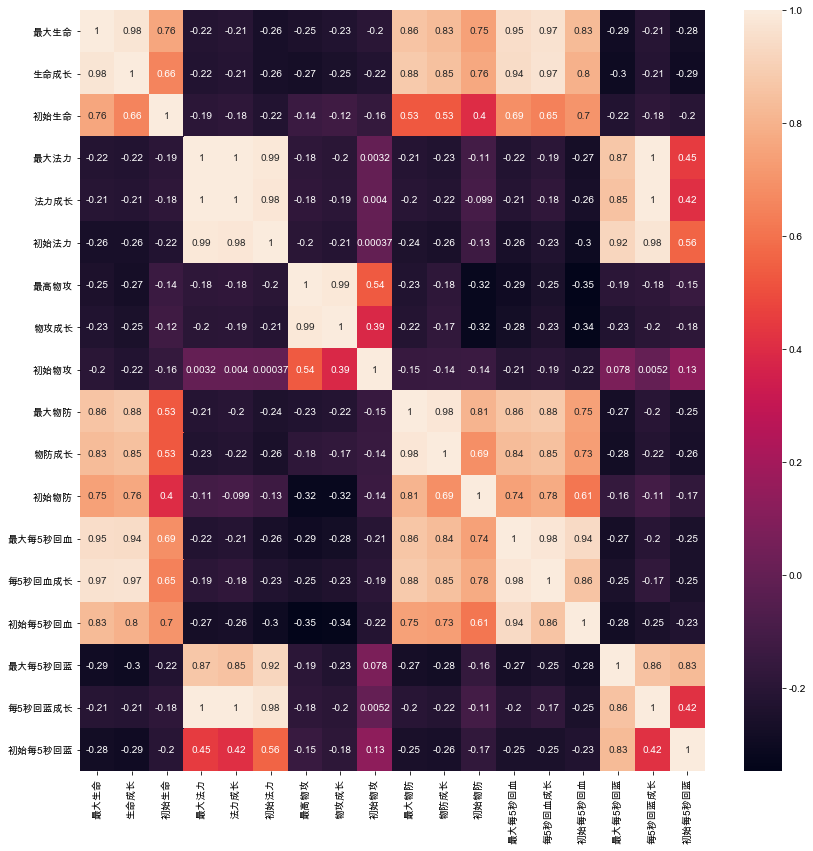

[4 6 9 0 3 3 3 9 0 4 8 4 0 6 0 8 6 0 3 5 7 5 5 5 5 5 5 5 1 1 6 1 1 1 1 1 1
 7 1 6 1 1 1 1 1 1 4 1 4 1 3 6 3 5 5 6 6 6 6 3 6 3 2 4 3 5 5 6 5]
24.477059539637192


<ipython-input-73-baac8a7a93e9>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['最大攻速'] = data['最大攻速'].apply(lambda x: float(x.strip('%'))/100)
<ipython-input-73-baac8a7a93e9>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['攻击范围'] = data['攻击范围'].map({'远程':1, '近战':0})
<ipython-input-73-baac8a7a93e9>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [73]:
# 对英雄进行划分（这次选用全部特征来聚类）
from sklearn.mixture import GaussianMixture
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score

# 加载数据
data_ori = pd.read_csv('data/heros.csv',encoding='gb18030')
features = ['最大生命', '生命成长', '初始生命', '最大法力', '法力成长', '初始法力', '最高物攻', '物攻成长',
       '初始物攻', '最大物防', '物防成长', '初始物防', '最大每5秒回血', '每5秒回血成长', '初始每5秒回血',
       '最大每5秒回蓝', '每5秒回蓝成长', '初始每5秒回蓝', '最大攻速', '攻击范围', '主要定位']

data = data_ori[features]

# 对英雄属性之间的关系进行可视化分析
# 设置plt正确显示中文
from matplotlib import font_manager
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 正常显示中文
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

# 用热力图呈现features_mean字段之间的联系
corr = data[features].corr()
plt.figure(figsize=(14,14))
# annot = True 显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()

# 对数据进行清洗
data['最大攻速'] = data['最大攻速'].apply(lambda x: float(x.strip('%'))/100)
data['攻击范围'] = data['攻击范围'].map({'远程':1, '近战':0})
data['主要定位'] = data['主要定位'].map({'坦克':0,'战士':1,'法师':2,'辅助':3,'射手':4,'刺客':5})

# 采用Z-Score规范化数据，保证每个特征维度的数据均值为0，方差为1
ss = StandardScaler()
data = ss.fit_transform(data)

# # 构造GMM聚类(聚类个数为10)
gmm = GaussianMixture(n_components = 10, covariance_type = 'full')
gmm.fit(data)

# # 训练数据
pred = gmm.predict(data)
print(pred)

# # 将分组结果输出到CSV中
data_ori.insert(0, '分组', pred)
data_ori.to_csv('data/hero_gmm.csv', index=False, sep=',',encoding='utf-8')

# # 对聚类数据进行评估
print(calinski_harabasz_score(data, pred))